In [104]:
#### from __future__ import print_function, division
import pandas as pd
import os
import requests
import shapely
import json
import urllib
from fiona.crs import from_epsg
import scipy as sp
from scipy import stats
from geopandas import GeoDataFrame


import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from scipy import stats
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma


%pylab inline

ALTERNATIVES = False 
GEOPANDAS = True
#from censusAPI import myAPI
#import queryCarto as qc

Populating the interactive namespace from numpy and matplotlib


By analyzing this problem, first, I will download the Zipcode shapefile from NYC Open data. (Please check figure 1). 


 I will acquire the Airbnb listing data from the Airbnb open data website (website: Inside Airbnb)

I will download the NYC 311 data information from the NYC Opendata.(Please check figure 4)


# 1. Data gethering and cleaning 
## NYC Zipcode Shapefile Data


In [105]:
#! curl -O https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip
#! unzip YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20\?filename\=ZIP_CODE_040114.zip -d $PUIDATA


In [106]:
zips = GeoDataFrame.from_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")


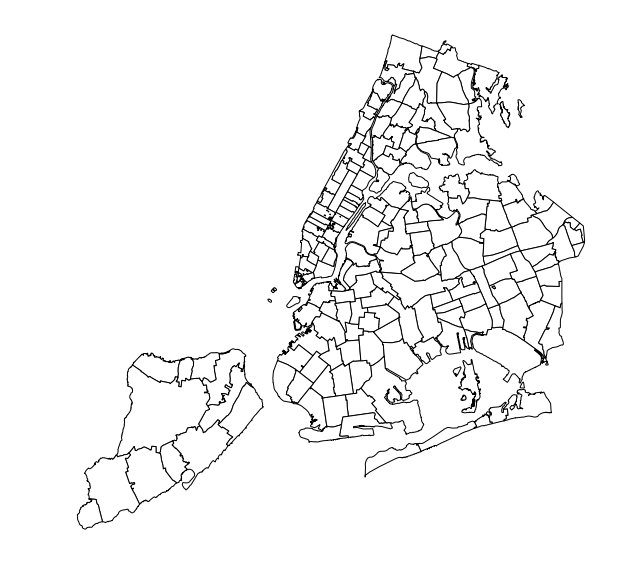

In [107]:
fig = pl.figure(figsize = (10,10))
ax = fig.add_subplot(111)
zips.plot(ax=ax, color='white', edgecolor='black', lw=1)
ax.axis('off');

In [108]:
zips

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,..."
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,..."
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,..."
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,..."
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,..."


In [109]:
zips.crs = {'int': 'epsg:2263'}

## PUMA shapefile

In [110]:
#url = "https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile"
#urllib.request.urlretrieve(url, "puma.gz") # OR "zipcdfile.zip"
#!unzip -d $PUIDATA puma.gz 

In [111]:
pumashp = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + "geo_export_0e9ae2e0-0ef4-403f-81f3-a617f9e2e5ed.shp")

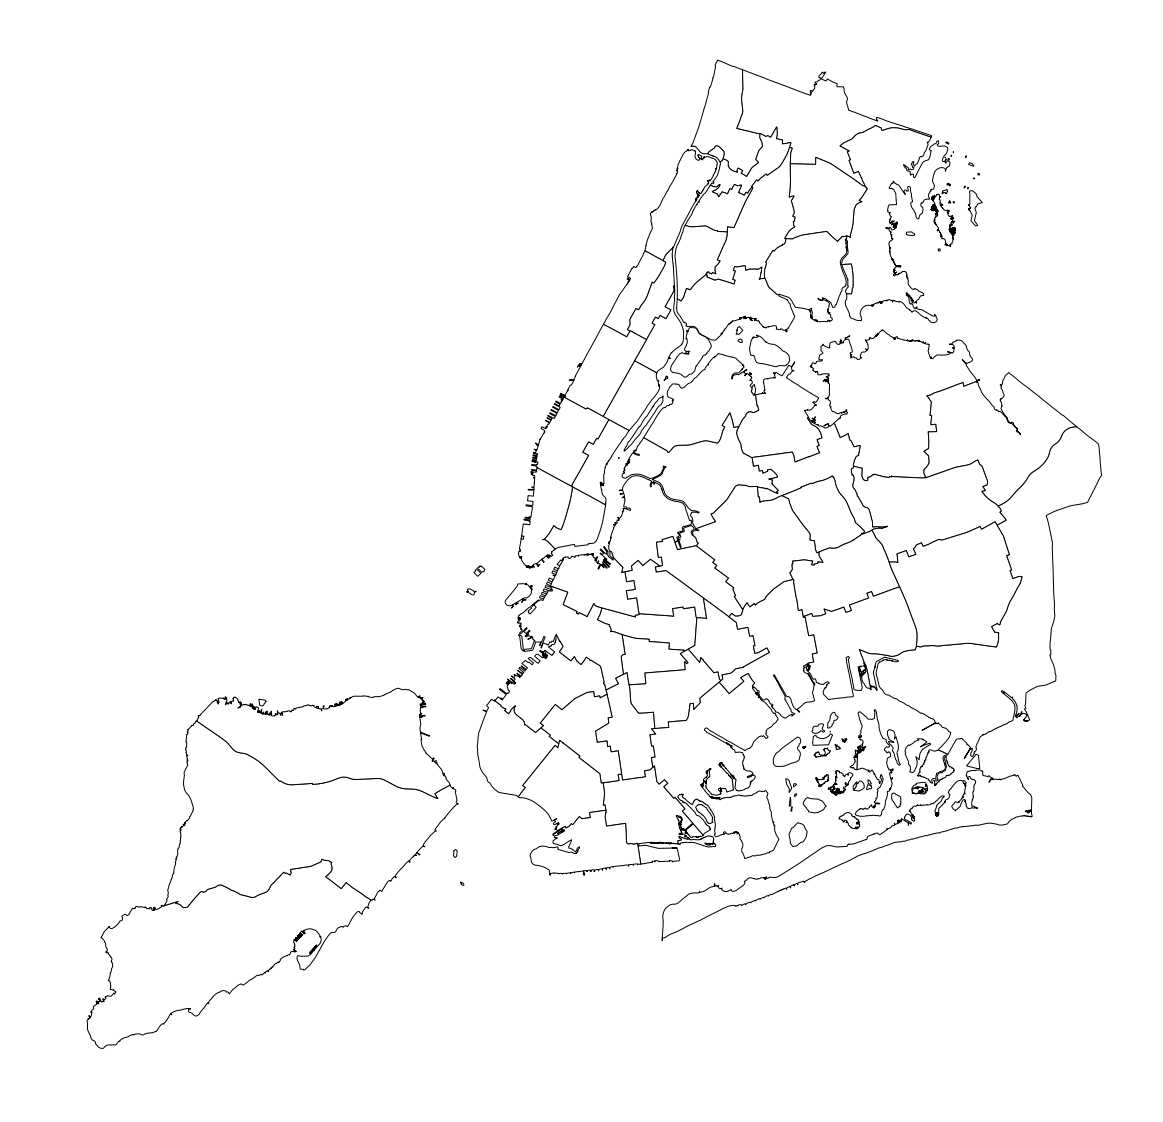

In [112]:
fig = pl.figure(figsize = (20,20))
ax = fig.add_subplot(111)
pumashp.plot(ax=ax, color="white", edgecolor="black", lw=1)
ax.axis('off');

## 311 Data

In [113]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yc3763/PUIdata


In [114]:
#! curl https://data.cityofnewyork.us/api/views/erm2-nwe9/rows.csv?accessType=DOWNLOAD > compdata.csv
#! mv compdata.csv $PUIDATA/compdata.csv

In [115]:
compdata = pd.read_csv(os.getenv("PUIDATA") + "/compdata_100k.csv")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
compdata.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,37873807,12/07/2017 08:35:06 AM,04/09/2018 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11421,79-15 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.684780,-73.860696,"(40.68478013346839, -73.86069646999317)"
1,37873801,12/07/2017 11:33:00 AM,12/07/2017 11:33:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37873810,12/07/2017 10:55:52 AM,04/18/2018 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11436,142-19 ROCKAWAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674073,-73.798092,"(40.67407324758509, -73.79809178433872)"
3,39260514,05/22/2018 07:22:00 PM,NaN,DEP,Department of Environmental Protection,Sewer,Manhole Cover Missing (Emergency) (SA3),NaN,10019,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.769117,-73.988559,"(40.76911692372326, -73.9885592924773)"
4,37873815,12/07/2017 10:24:00 AM,12/08/2017 08:16:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11414,155-36 78 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.663076,-73.855490,"(40.663076235334685, -73.85549009667056)"


In [117]:
compdata.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [118]:
compdata2 = compdata.drop(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
        'Descriptor', 'Location Type', 
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude'], axis = 1)

In [119]:
compdata2.head(10)

,Complaint Type,Incident Zip,Location
0,Graffiti,11421,"(40.68478013346839, -73.86069646999317)"
1,Street Light Condition,NaN,NaN
2,Graffiti,11436,"(40.67407324758509, -73.79809178433872)"
3,Sewer,10019,"(40.76911692372326, -73.9885592924773)"
4,Request Large Bulky Item Collection,11414,"(40.663076235334685, -73.85549009667056)"
5,Street Light Condition,NaN,NaN
6,Noise - Residential,10452,"(40.833725947526645, -73.92093583276625)"
7,Noise - Residential,10455,"(40.81178153323563, -73.90249835817075)"
8,Rodent,10035,"(40.801088930562486, -73.94538402026387)"
9,Street Light Condition,10455,"(40.815289382176125, -73.90260882541915)"


In [120]:
compdata2.rename(columns={'Incident Zip':'ZIPCODE'}, index =str, inplace=True)

In [127]:
# Function that cleans the Incident Zip values and returns nan for data that cannot be cleaned
def correct_zip(zip_code):
    try:
        zip_code = int(float(zip_code))
    except:
        try:
            zip_code = int(float(zip_code.split('-')[0]))
        except:
            return np.nan
    if zip_code < 10000 or zip_code > 19999:
        return np.nan
    else:
        return str(zip_code)

In [128]:
compdata2['ZIPCODE'] = compdata2['ZIPCODE'].apply(correct_zip)

In [129]:
#Remove rows from data that have incident zip as null
compdatazip = compdata2[compdata2['ZIPCODE'].notnull()]
compdatazip.head(10)

,Complaint Type,ZIPCODE,Location
0,Graffiti,11421,"(40.68478013346839, -73.86069646999317)"
2,Graffiti,11436,"(40.67407324758509, -73.79809178433872)"
3,Sewer,10019,"(40.76911692372326, -73.9885592924773)"
4,Request Large Bulky Item Collection,11414,"(40.663076235334685, -73.85549009667056)"
6,Noise - Residential,10452,"(40.833725947526645, -73.92093583276625)"
7,Noise - Residential,10455,"(40.81178153323563, -73.90249835817075)"
8,Rodent,10035,"(40.801088930562486, -73.94538402026387)"
9,Street Light Condition,10455,"(40.815289382176125, -73.90260882541915)"
12,Request Large Bulky Item Collection,11414,"(40.6478338669222, -73.84656807116987)"
13,Request Large Bulky Item Collection,11365,"(40.7460927383945, -73.78712965039881)"


## Airbnb data

In [130]:
#! curl http://data.insideairbnb.com/united-states/ny/new-york-city/2018-12-06/visualisations/listings.csv > airbnb.csv
#! mv airbnb.csv $PUIDATA/airbnb.csv

In [131]:
bnb = pd.read_csv("%s/airbnb.csv"%os.getenv("PUIDATA"))

In [132]:
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2515,Stay at Chez Chic budget room #1,2758,Steph,Manhattan,Harlem,40.799205,-73.953676,Private room,59,2,175,2018-11-18,1.42,3,298
1,21456,Light-filled classic Central Park,42032,Dana,Manhattan,Upper West Side,40.797642,-73.961775,Entire home/apt,140,5,76,2018-10-16,0.72,1,248
2,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647486,-73.972370,Private room,149,1,9,2018-10-19,0.25,8,365
3,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.828028,-73.947308,Private room,89,1,1,2018-10-09,0.51,1,365
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753621,-73.983774,Entire home/apt,225,1,41,2018-12-02,0.37,2,350


In [133]:
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [134]:
airbnb = bnb.drop([ 'id', 'host_id', 'host_name', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month','availability_365'], axis=1)

In [135]:
airbnbgeo = GeoDataFrame(airbnb.copy())

In [136]:
def zip(*iterables):
    # zip('ABCD', 'xy') --> Ax By
    sentinel = object()
    iterators = [iter(it) for it in iterables]
    while iterators:
        result = []
        for it in iterators:
            elem = next(it, sentinel)
            if elem is sentinel:
                return
            result.append(elem)
        yield tuple(result)

In [137]:
airbnbgeo['lonlat'] = list(zip(airbnbgeo.longitude,airbnbgeo.latitude))


In [138]:
airbnbgeo['geometry'] = airbnbgeo[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

In [139]:
airbnbgeo = GeoDataFrame(airbnbgeo, geometry = "geometry")

In [140]:
airbnbgeo.crs = {'int': 'epsg:2263'}

In [141]:
airbnbgeo.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,calculated_host_listings_count,lonlat,geometry
0,Stay at Chez Chic budget room #1,Manhattan,Harlem,40.799205,-73.953676,3,"(-73.9536757454, 40.7992047994)",POINT (-73.95367574543542 40.79920479936168)
1,Light-filled classic Central Park,Manhattan,Upper West Side,40.797642,-73.961775,1,"(-73.9617748438, 40.7976422112)",POINT (-73.96177484377306 40.79764221122139)
2,Clean & quiet apt home by the park,Brooklyn,Kensington,40.647486,-73.972370,8,"(-73.9723695401, 40.6474860817)",POINT (-73.97236954007957 40.64748608166989)
3,"Upper Manhattan, New York",Manhattan,Harlem,40.828028,-73.947308,1,"(-73.9473084685, 40.8280280716)",POINT (-73.9473084684745 40.82802807160385)
4,Skylit Midtown Castle,Manhattan,Midtown,40.753621,-73.983774,2,"(-73.9837738111, 40.7536207266)",POINT (-73.98377381114605 40.75362072657246)


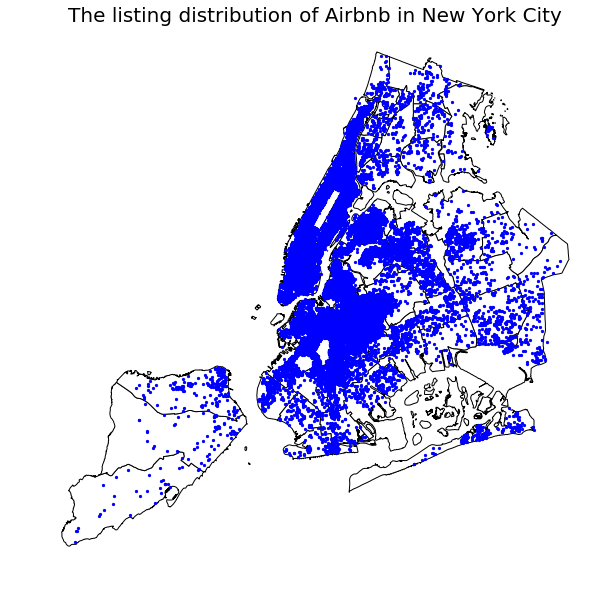

In [142]:
fig = pl.figure(figsize = (10,10))
ax = fig.add_subplot(111)
pumashp.plot(ax=ax, color='white', edgecolor='black', lw=1)
airbnbgeo.plot(ax=ax, color='blue', markersize = 5 )
ax.set_title('The listing distribution of Airbnb in New York City', fontsize = 20)
ax.axis('off');

In [143]:
if GEOPANDAS:
    import shapely
    from shapely import geometry
    import collections
    import geopandas as gp
    from fiona.crs import from_epsg
    
    
    zipsNYC = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")
    zipsNYC.crs = from_epsg(2263) 
    

    goodcoords = ((airbnbgeo['latitude']>0)  & (airbnbgeo['longitude']<80))
    airbnbgeo = airbnbgeo[goodcoords]
    airbnbgeo.crs = from_epsg(4326)
    airbnbgeo = airbnbgeo.to_crs({'init': 'epsg:4326'}) 
    zipsNYC = zipsNYC.to_crs({'init': 'epsg:4326'}) 
    airbnbZip = gp.sjoin(airbnbgeo, zipsNYC, how="inner", op='within')
    airbnbZip.to_csv(os.getenv("PUIDATA") + "/airbnbZIP.csv")

In [144]:
airbnbZip.shape, airbnb.shape

((49101, 21), (49056, 6))

In [145]:
print ("the reducted dataset is {:d} observations, {:.2f} of the original".\
       format(airbnbZip.shape[0], 
              (airbnbZip.shape[0] * 1.0 / airbnb.shape[0])))

the reducted dataset is 49101 observations, 1.00 of the original


In [146]:
airbnbZip.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,calculated_host_listings_count,lonlat,geometry,index_right,ZIPCODE,...,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
0,Stay at Chez Chic budget room #1,Manhattan,Harlem,40.799205,-73.953676,3,"(-73.9536757454, 40.7992047994)",POINT (-73.95367574543542 40.79920479936168),48,10026,...,New York,34313.0,1.109268e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
56,Stay at Chez Chic budget Room #2,Manhattan,Harlem,40.799034,-73.954063,3,"(-73.9540629543, 40.7990341242)",POINT (-73.95406295429153 40.79903412423927),48,10026,...,New York,34313.0,1.109268e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
98,Couldn't Be Closer To Columbia Uni,Manhattan,Morningside Heights,40.805493,-73.959237,2,"(-73.9592369284, 40.8054933218)",POINT (-73.95923692841976 40.80549332183545),48,10026,...,New York,34313.0,1.109268e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
123,Beautiful Room in Central Harlem,Manhattan,Harlem,40.805821,-73.953403,1,"(-73.953402806, 40.8058205829)",POINT (-73.95340280602835 40.80582058285149),48,10026,...,New York,34313.0,1.109268e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0
156,Beautiful Uptown Manhattan apartmnt,Manhattan,Harlem,40.802344,-73.956028,1,"(-73.9560283632, 40.8023441484)",POINT (-73.9560283631688 40.80234414835286),48,10026,...,New York,34313.0,1.109268e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0


# 2. Feature engineering
## For Airbnb data, aggregate the Airbnb room availability data by Zipcode

In [147]:
airbnbZip.columns

Index(['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'calculated_host_listings_count', 'lonlat', 'geometry', 'index_right',
       'ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN'],
      dtype='object')

In [148]:
airbnbZip_drop = airbnbZip.drop(['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'calculated_host_listings_count', 'index_right','geometry',
        'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN'], axis =1)

In [149]:
airbnbZip_drop.head()

,lonlat,ZIPCODE
0,"(-73.9536757454, 40.7992047994)",10026
56,"(-73.9540629543, 40.7990341242)",10026
98,"(-73.9592369284, 40.8054933218)",10026
123,"(-73.953402806, 40.8058205829)",10026
156,"(-73.9560283632, 40.8023441484)",10026


In [150]:
airbnbZip_drop1 = airbnbZip_drop.reset_index()

In [151]:
airbnbZip_drop2 = airbnbZip_drop1.drop(['index'],axis=1)
airbnbZip_drop2.head()

,lonlat,ZIPCODE
0,"(-73.9536757454, 40.7992047994)",10026
1,"(-73.9540629543, 40.7990341242)",10026
2,"(-73.9592369284, 40.8054933218)",10026
3,"(-73.953402806, 40.8058205829)",10026
4,"(-73.9560283632, 40.8023441484)",10026


In [152]:
zip_count = airbnbZip_drop.groupby(['ZIPCODE']).count()


In [153]:
zip_count.rename(columns={'lonlat':'listingcounts'}, index =str, inplace=True)

In [154]:
zip_count.head(10)

,listingcounts
ZIPCODE,
10001,602
10002,1271
10003,1212
10004,67
10005,231
10006,93
10007,97
10009,1213
10010,345


#### For 311 data, calculate the complaint percentage in each zip code area

#### compdatazip.head(5)

In [155]:
compdatazip1 = compdatazip.reset_index()

In [156]:
compdatazip2 = compdatazip1.drop(['index'],axis=1)
compdatazip2.head()

,Complaint Type,ZIPCODE,Location
0,Graffiti,11421,"(40.68478013346839, -73.86069646999317)"
1,Graffiti,11436,"(40.67407324758509, -73.79809178433872)"
2,Sewer,10019,"(40.76911692372326, -73.9885592924773)"
3,Request Large Bulky Item Collection,11414,"(40.663076235334685, -73.85549009667056)"
4,Noise - Residential,10452,"(40.833725947526645, -73.92093583276625)"


In [157]:
compdatazip_top = compdatazip.groupby(['Complaint Type']).size().nlargest(5).reset_index(name='top5')

In [158]:
compdatazip_top['Complaint Type']

0                         HEAT/HOT WATER
1    Request Large Bulky Item Collection
2                   UNSANITARY CONDITION
3                               PLUMBING
4                           Water System
Name: Complaint Type, dtype: object

In [159]:
com_zip = compdatazip[compdatazip['Complaint Type'].isin(compdatazip_top['Complaint Type'])].groupby(['ZIPCODE', 'Complaint Type']).count()
com_zip.head()

Location
ZIPCODE Complaint Type                               
10000   Water System                                1
10001   HEAT/HOT WATER                             56
        PLUMBING                                    3
        Request Large Bulky Item Collection        11
        UNSANITARY CONDITION                        6

In [160]:
comzip = com_zip.reset_index()
comzip.head()

,ZIPCODE,Complaint Type,Location
0,10000,Water System,1
1,10001,HEAT/HOT WATER,56
2,10001,PLUMBING,3
3,10001,Request Large Bulky Item Collection,11
4,10001,UNSANITARY CONDITION,6


In [161]:
comzip.rename(columns={'Location':'ComCounts'}, index =str, inplace=True)

In [162]:
comzip.head()

,ZIPCODE,Complaint Type,ComCounts
0,10000,Water System,1
1,10001,HEAT/HOT WATER,56
2,10001,PLUMBING,3
3,10001,Request Large Bulky Item Collection,11
4,10001,UNSANITARY CONDITION,6


In [163]:
sumcomzip= comzip.groupby(['ZIPCODE']).sum()
sumcomzip.head(10)

,ComCounts
ZIPCODE,
10000,1
10001,89
10002,323
10003,251
10004,2
10005,6
10006,25
10007,13
10009,239


## Merge the dataset 

In [164]:
combnbzip = zips.merge(
    sumcomzip.reset_index()
    , left_on = 'ZIPCODE'
    , right_on = 'ZIPCODE'    
).merge(
    zip_count.reset_index()
    , left_on = 'ZIPCODE'
    , right_on = 'ZIPCODE' 
)

In [165]:
combnbzip.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,ComCounts,listingcounts
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,...",65,38
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,...",879,548
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",852,89
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,...",935,661
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,...",347,319


In [166]:
combnbzip.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'ComCounts', 'listingcounts'],
      dtype='object')

In [167]:
combnbzip1 = combnbzip.drop(['BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN'],axis =1)
combnbzip1.head()

,ZIPCODE,geometry,ComCounts,listingcounts
0,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",65,38
1,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",879,548
2,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",852,89
3,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",935,661
4,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",347,319


## Plot the dataset on the NYCZip shapefile

In [168]:
combnbzip1['listingcounts_ln'] = combnbzip1['listingcounts'].apply(np.log)

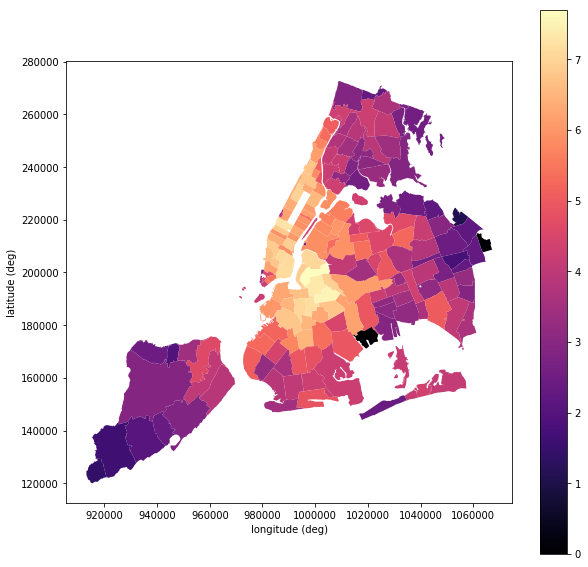

In [169]:
ax = combnbzip1.plot(column='listingcounts_ln', 
                   cmap='magma', markersize=0.1, figsize=(10,10), legend=True)
ax.set_ylabel("latitude (deg)")
ax.set_xlabel("longitude (deg)");

In [170]:
combnbzip1['ComCounts_ln'] = combnbzip1['ComCounts'].apply(np.log)

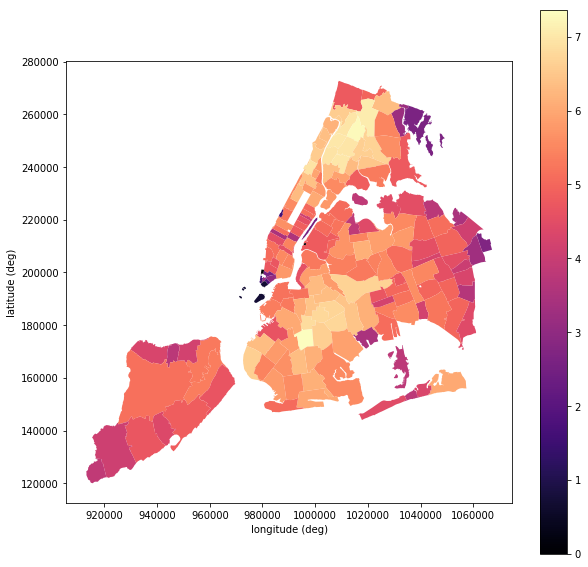

In [171]:
ax = combnbzip1.plot(column='ComCounts_ln', 
                   cmap='magma', markersize=0.1, figsize=(10,10), legend=True)
ax.set_ylabel("latitude (deg)")
ax.set_xlabel("longitude (deg)");

# Analysis 

# Null Hypothesis: The more 311 complaints in the Zipcode area, the less airbnb listing will have in that zipcode area. Significant interval = 0.05

### Use  Bivariate linear regression check the correlation coeffecient between the airbnb listing and the complaint number in each zip code area. 


In [210]:
lm = smf.ols(formula='listingcounts_ln~ComCounts_ln', data = combnbzip1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       listingcounts_ln   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     31.69
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           6.54e-08
Time:                        19:57:57   Log-Likelihood:                -340.86
No. Observations:                 189   AIC:                             685.7
Df Residuals:                     187   BIC:                             692.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        2.3570      0.401      5.883   

Text(0.5,42.6758,'listingcounts_ln')

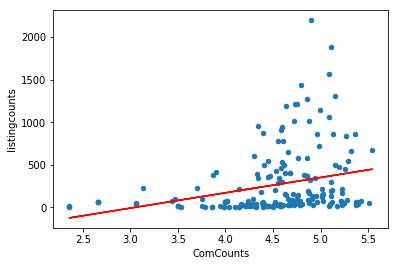

In [203]:
pd.DataFrame(combnbzip1).plot(kind='scatter',x='ComCounts',y='listingcounts')
#ax.plot(combnbzip1.ComCounts, lm.fittedvalues, 'k')
pd.DataFrame(combnbzip1).loc[:, 'price_predict'] = lm.predict()
plt.plot(pd.DataFrame(combnbzip1).ComCounts, pd.DataFrame(combnbzip1).price_predict, 'r-', label = 'Without Intercept')
ax.set_ylabel("ComCounts_ln")
ax.set_xlabel("listingcounts_ln")

## Use Kstest to test the Null Hypothesis Assess which of these distributions is most consistent with a Gaussian.

### Null Hypothesis: the vairiable sample for all three features (unemployment fraction, parks condition, and number of parks) is drawn from a Gaussian distribution, p-value 0.05

In [204]:
alpha = 0.05

In [206]:
print ("listingcounts by zipcode")
p = sp.stats.kstest((combnbzip.ComCounts - combnbzip.ComCounts.mean()) / 
                combnbzip.ComCounts.std(), "norm")[1]

if p > alpha:
    print("the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected")
else: 
    print("we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of", alpha)

listingcounts by zipcode
we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of 0.05


In [208]:
print ("complaints by zipcode,")
p = sp.stats.kstest((combnbzip.listingcounts - combnbzip.listingcounts.mean()) / combnbzip.listingcounts.std(), 
                "norm")[1]

if p > alpha:
    print("the Null hypothesis that the samples are drawn from a Gaussian distribution cannot be rejected")
else: 
    print("we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of", alpha)

complaints by zipcode,
we reject the Null hypothesis that the samples are drawn from a Gaussian distribution at a p-value of 0.05


## Pearson R test 

In [101]:
sp.stats.pearsonr(combnbzip.listingcounts, combnbzip.ComCounts )

(0.18958606236344211, 0.008979688569266538)

# Link to Authorea: 

https://www.authorea.com/343288/VPjAhQ35RFd_8x6Qv--p7g